In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns
os.getcwd()

'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part3'

Ch 11 Objective
* Missing Values 
* Outlier
* Error


### 데이터 결측값(missing values) 확인
* .info() : total entries와 column내 entries가 다르다면 해당 column에 결측값이 있음을 보여줍니다.
<br> 

* .isna() : sum()과 함께 사용하면 column에 결측값이 얼마나 있는지 알 수 있습니다.

In [2]:
air_df = pd.read_csv('data/ch11/Airdata.csv')

air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


In [3]:
for col in air_df.columns :
    n_mv = sum(air_df[col].isna())
    print('{} : {}'.format(col,n_mv))

DateTime : 0
Temperature : 0
Humidity : 0
Wind_Speed : 0
Wind_Direction : 0
NO2_Location_A : 120
NO2_Location_B : 580
NO2_Location_C : 132


### Types of Missing Values
* MCAR(Missing completely at random) : 결측값이 우연에 의해 발생되는 경우를 말합니다. 불안정한 인터넷 상태로 원래 전송되어야 할 자료가 들어오지 않는 경우가 해당됩니다.
<br>

* MAR(Missing at random) : 결측값이 알지못하는 어떤 오류로 인해서 발생되는 경우입니다. 기계가 노후화 되면서 측정할 수 있는 범위가 점점 감소하다보니 원래라면 들어오는 값이 들어오지 않는 경우가 있습니다.
<br>

* MNAR(Missing not at random) : 결측값이 어떤 의도에 의해서 발생되는 경우입니다. 데이터가 노출되면 발생할 손해가 예상돼 의도적으로 공개하지 않는 경우가 있습니다.

### Missing Value 다루기
* Keep it as is : 결측값이 없어도 실행 가능한 모델(예로들어 KNN)일 경우 데이터를 따로 제거하거나 대체하지 않습니다.
<br>


* Remove data objects with missing values : 부득이한 경우(모든 방법이 적용되지 않는 경우) 행을 삭제하는 방법입니다. 
<br>


* Remove the attributes with missing values : 결측값이 15%이상 있다면 해당 열은 제거하는게 차라리 더 낫습니다.
<br>

* Estimate and impute missing values : 결측값을 대체하는 방법에는 네가지 방법이 있습니다.
  * MCAR인 경우 Central tendency(Mean,Mode,Median)을 활용하는 방법입니다.
  * Data_Series이고 MCAR인 경우 Interpolation을 사용합니다.
  * MAR인 경우 Central tendency를 쓰되 가장 가까운 값을 가지는(?) 것으로 사용합니다.
  * MNAR인 경우 이상적인 방법은 아니지만 Regression Analysis를 사용합니다.

### 결측값을 대체하는 이유는 오류를 최소화하기 위함이지 예측 정확도를 올리기 위함이 아닙니다.

### MCAR 다루기(numerical attribute)

In [4]:
val = []
for boolean in [True, False] :
    BM = air_df['NO2_Location_A'].isna() == boolean
    air_df_bool = air_df[BM]['Temperature']
    val.append(air_df_bool)

print(len(val))

2


Missing value와 not missing Value가 차이가 없으므로 의도되지 않았음을 알 수 있다.

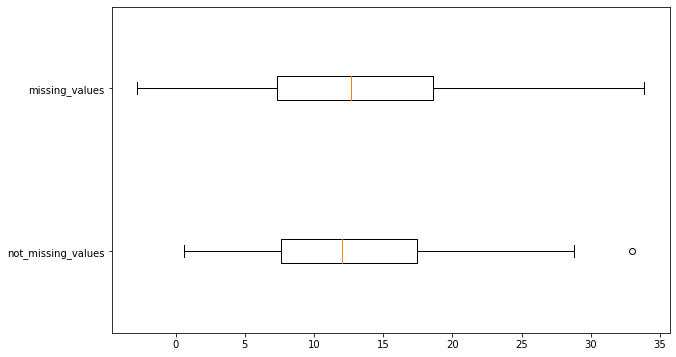

In [5]:
plt.figure(figsize=(10,6))
plt.boxplot(val, vert=False)
plt.yticks([1,2], ['not_missing_values','missing_values'])
plt.show()

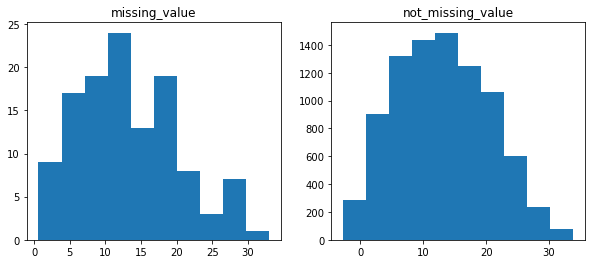

In [6]:
plt.figure(figsize=(10,4))
name = ['missing_value','not_missing_value']
for i, dat in enumerate(val) :
    plt.subplot(1,2,i+1)
    plt.hist(dat)
    plt.title(name[i])
plt.show()

### two-sample t-test (통계적 방법)
 numerical attributes인 두 그룹 간 값 차이가 얼마나 있는지 확인하는 방법입니다.

* T-test가 뭐지? 두 샘플이 같은 모집단에서 추출된 것인지 확인하는 방법. 같은 모집단에서 추출됐다는 뜻은 두 샘플이 연관성 있다는 뜻임.
   
* P-value가 높으면 두 대상이 같음을 의미함. P-value가 0.05 보다 클 경우 가설이 틀렸다고 말할만한 어떤 근거도 없음을 의미한다.(가설이 맞았다는걸 말하고 싶은거 같지는 않고 틀리지 않았다 정도 선에서 이해해야할듯)

In [7]:
from scipy.stats import ttest_ind
BM = air_df['NO2_Location_A'].isna()
ttest_ind(air_df[BM].Temperature, air_df[~BM].Temperature)

Ttest_indResult(statistic=0.05646499065315542, pvalue=0.9549726689684548)

In [8]:
air_df.DateTime = pd.to_datetime(air_df.DateTime, format='%m/%d/%Y %H:%M')

### series 전체에 datetime을 적용하고 싶으면 dt를 활용하자.

In [9]:
air_df['hour'] = air_df.DateTime.dt.hour
air_df['day'] = air_df.DateTime.dt.day
air_df['month'] = air_df.DateTime.dt.month
air_df['weekday'] = air_df.DateTime.dt.day_name()

### MCAR 다루기(Categorical attribute)

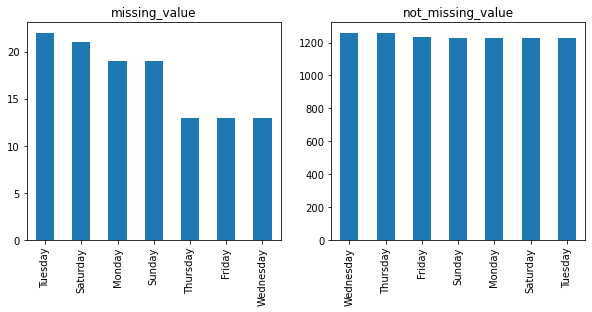

In [10]:
## Categorical value 비교는 bar plot
plt.figure(figsize=(10,4))
for i, poss in enumerate([True, False]) : 
    BM = air_df['NO2_Location_A'].isna() == poss
    plt.subplot(1,2,i+1)
    sorted_air_df = air_df[BM]['weekday'].value_counts().plot.bar()
    plt.xticks(rotation=90)
    if poss == True :
        plt.title('missing_value')
    else :
        plt.title('not_missing_value')



In [11]:
from scipy.stats import chi2_contingency
BM = air_df['NO2_Location_A'].isna()
contingency_table = pd.crosstab(BM,air_df.weekday)
chi2_contingency(contingency_table)

(6.048964133655503,
 0.41772751510388023,
 6,
 array([[1230.95081967, 1230.95081967, 1230.95081967, 1230.95081967,
         1254.62295082, 1230.95081967, 1254.62295082],
        [  17.04918033,   17.04918033,   17.04918033,   17.04918033,
           17.37704918,   17.04918033,   17.37704918]]))

### MCAR : Keep them as is
* 아래 차트는 MCAR 데이터를 사용하고, 평균을 다루기 때문에 굳이 결측값을 바꾸거나 제거할 필요 없습니다.

<AxesSubplot:xlabel='hour'>

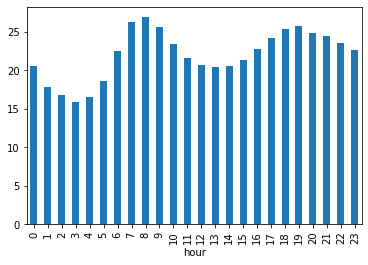

In [12]:
#MCAR
air_df.groupby('hour')['NO2_Location_A'].mean().plot.bar()

### Interpolation 
* MCAR이고 Data_Series를 다루니 Interpolation 사용가능 합니다.

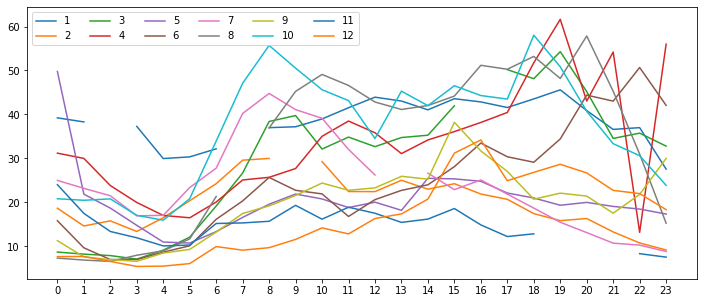

In [13]:
plt.figure(figsize=(12,5))
BM = air_df.day == 1
a = air_df[BM].groupby(['month','hour'])['NO2_Location_A'].mean()
# index = range(0,24)
for val in air_df.month.unique() : 
    plt.plot(a[val], label = val)
plt.xticks(range(0,24))
plt.legend(ncol=6)
plt.show()    


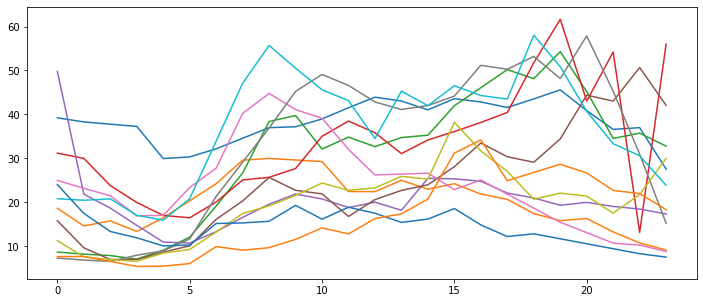

In [14]:
abc = air_df.NO2_Location_A.interpolate(method='linear')
month_poss = air_df.month.unique()
hour_poss = air_df.hour.unique()

plt.figure(figsize=(12,5))
BM = air_df.day == 1

for mn in month_poss :
    BM = (air_df.month == mn)  & (air_df.day == 1)
    plt.plot(abc[BM].values,label=mn)



### MAR : Keep them as is 
* 아래 차트는 MNAR과 MCAR 데이터를 사용하므로  해당 방법을 사용해도 문제 없습니다.

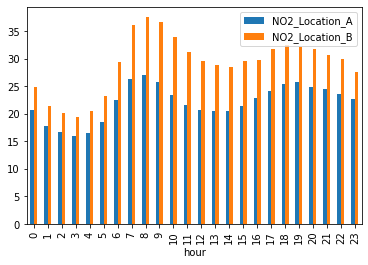

In [47]:
air_df.groupby('hour')[['NO2_Location_A','NO2_Location_B']].mean().plot.bar()
plt.show()

### MNAR : Keep them as is
* MNAR은 의도된 결측값이 발생한 경우이므로 데이터를 대체하기 보단 재발 방지를 위해 관련 부서에게 전파해야한다.

* 만약 법적으로 문제 없다면 Keep them as is 전략을 사용해도 된다.

In [15]:
kidney_disease_df = pd.read_csv('data/ch11/kidney_disease.csv')

for attr in kidney_disease_df.columns :
    MV = sum(kidney_disease_df[attr].isna())
    print('{}_{}_{}'.format(attr,MV, MV/len(kidney_disease_df[attr])))

rc_131_0.3275
sc_17_0.0425
pcv_71_0.1775
sg_47_0.1175
hemo_52_0.13
diagnosis_0_0.0


### Remove data objects with missing values

When the number of missing values are across different attributes and are high(more than 15%), 

it might be the case that most of the missing values happen for the same data objectes, 

and that could be very problematic for our analysis

### Missing value 시각화

<AxesSubplot:>

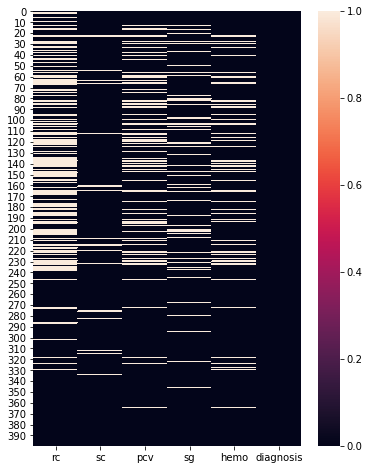

In [16]:
plt.figure(figsize=(6,8))
sns.heatmap(kidney_disease_df.isna())

### Outlier

In [17]:
responses_df = pd.read_csv('data/ch11/responses.csv')

<AxesSubplot:xlabel='Weight', ylabel='Height'>

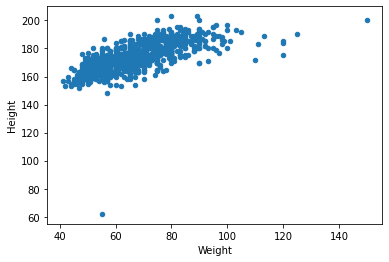

In [18]:
responses_df.plot.scatter(x='Weight', y='Height')

<AxesSubplot:xlabel='God', ylabel='Education'>

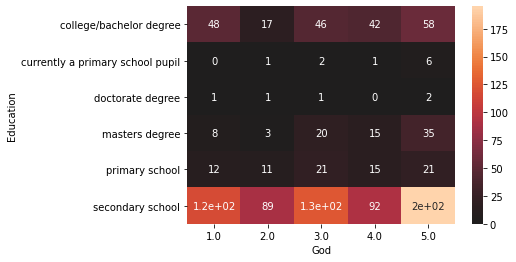

In [19]:
cont_tab = pd.crosstab(responses_df.Education,responses_df.God)
sns.heatmap(cont_tab,annot=True,center=0.5)

<AxesSubplot:xlabel='Age', ylabel='Education'>

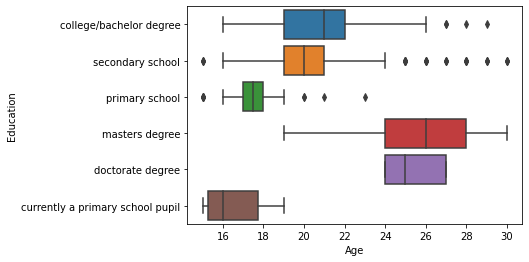

In [20]:
sns.boxplot(x=responses_df.Age,y=responses_df.Education)

### boxplot은 결측값이 있으면 그려지지 않는다.

* 그럴 땐 dropna()를 사용하자!

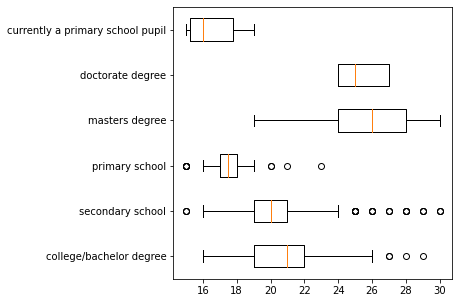

In [21]:
# education 하나씩 sorting 한 다음 age boxplot을 그리면 된다.
edu = responses_df.Education.dropna().unique()
result_edu = []
for name in edu :
    BM = responses_df.Education == name
    edu_sort = responses_df[BM].Age.dropna()
    result_edu.append(edu_sort)

# print(result_edu)
plt.figure(figsize=(5,5))
result_edu_se = pd.Series(result_edu, index=edu)
# result_edu_se[3]
plt.boxplot(result_edu_se,vert=False)
plt.yticks(list(range(1,len(edu)+1)),edu)

plt.show()

In [22]:
dimensions = ['Country', 'Metal or Hardrock', 'Folk', 'Musical']
xs = responses_df[dimensions]

In [23]:
xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1005 non-null   float64
 1   Metal or Hardrock  1007 non-null   float64
 2   Folk               1005 non-null   float64
 3   Musical            1008 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


### Dealing with outliers
* Do nothing
* Replace with the upper cap or lower cap
* Perform a log transforamtion
* Remove data objects with outliers

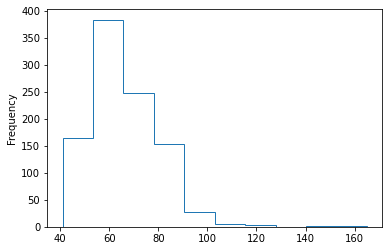

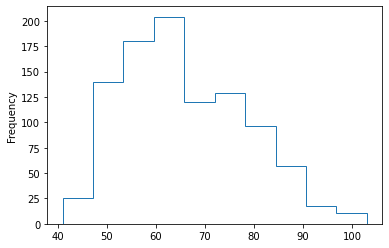

In [24]:
responses_df.Weight.plot.hist(histtype='step')
plt.show()
BM = responses_df.Weight<105
responses_df.Weight[BM].plot.hist(histtype='step')
plt.show()

### Outlier 제거 전

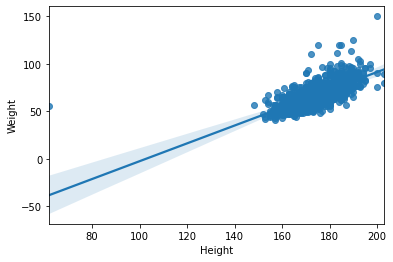

In [25]:
sns.regplot(x='Height', y='Weight', data=responses_df)
plt.show()

### Outlier 제거 후 

* ~은 not으로 쓰이는듯

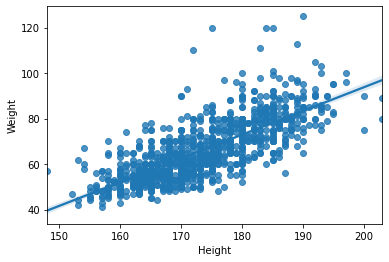

In [26]:
BM = (responses_df.Weight > 130) | (responses_df.Height < 70)
sns.regplot(x='Height', y='Weight', data=responses_df[~BM])
plt.show()

### Height, Weight, Gender로 Linear Regrssion 만들기

In [27]:
### Regression은 결측값이 있으면 모델 생성이 되지 않는다.
new_df = responses_df.loc[:,['Weight', 'Height', 'Gender']]
for col in new_df.columns :
    print(f'{col} :{sum(new_df[col].isna())}')
new_df.dropna(inplace=True)

Weight :20
Height :20
Gender :6


<AxesSubplot:>

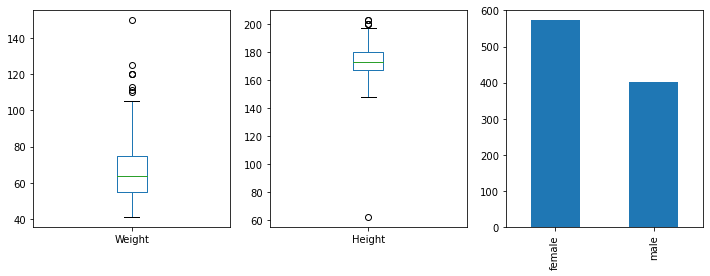

In [28]:
### detecting univariate outlier 
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
new_df.iloc[:,0].plot.box()

plt.subplot(1,3,2)
new_df.iloc[:,1].plot.box()

plt.subplot(1,3,3)
new_df.iloc[:,2].value_counts().plot.bar()

**Outlier 바꾸기**

In [29]:
### Weight 바꾸기
Q3 = new_df.Weight.quantile(0.75)
Q1 = new_df.Weight.quantile(0.25)
IQR = Q3 - Q1
upper_cap = Q3 + 1.5*IQR

BM = new_df.Weight > upper_cap
new_df.loc[new_df[BM].index,'Weight'] = upper_cap

In [30]:
### Height 바꾸기
Q3 = new_df.Height.quantile(0.75)
Q1 = new_df.Height.quantile(0.25)
IQR = Q3 - Q1
upper_cap = Q3 + 1.5*IQR
lower_cap = Q1 - 1.5*IQR

BM = new_df.Height > upper_cap
new_df.loc[new_df[BM].index,'Height'] = upper_cap
BM = new_df.Height < lower_cap
new_df.loc[new_df[BM].index,'Height'] = lower_cap

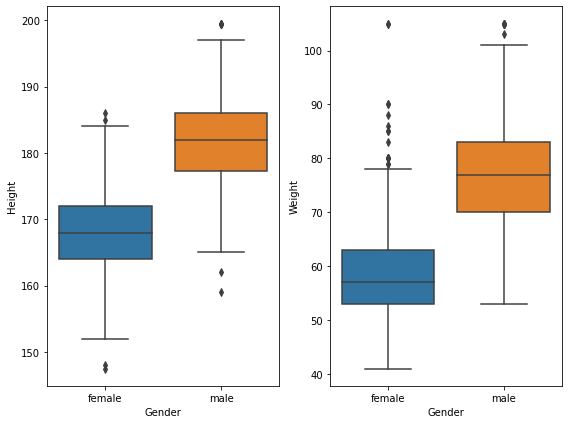

In [31]:
# Detecting bivariate outlier
new_df_height = new_df[['Gender','Height']]
new_df_weight = new_df[['Gender','Weight']]

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(x='Gender',y='Height',data=new_df_height)
plt.subplot(1,2,2)
sns.boxplot(x='Gender',y='Weight',data=new_df_weight)
plt.tight_layout()
plt.show()

In [32]:
# bivariate 수정하기
for gen in new_df.Gender.unique() : 
    BM = new_df.Gender == gen
    wdf = new_df[BM]
    for attr in ['Height', 'Weight'] : 
        wdf_2 = wdf[attr]
        Q3 = wdf_2.quantile(0.75)
        Q1 = wdf_2.quantile(0.25)
        IQR = Q3 - Q1
        upper_cap = Q3 + 1.5*IQR
        lower_cap = Q1 - 1.5*IQR

        BM = wdf_2 > upper_cap
        new_df.loc[wdf[BM].index,attr] = upper_cap
        BM = wdf_2 < lower_cap
        new_df.loc[wdf[BM].index,attr] = lower_cap

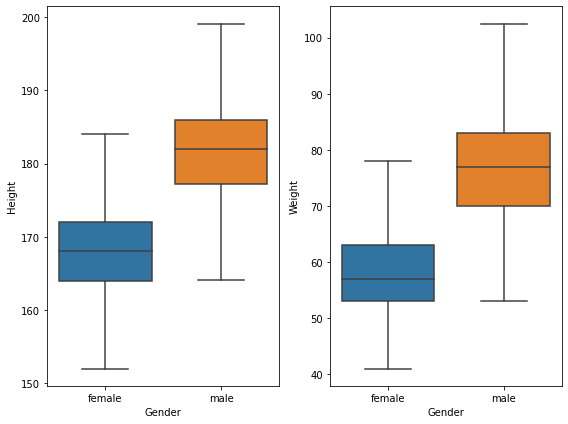

In [33]:
new_df_height = new_df[['Gender','Height']]
new_df_weight = new_df[['Gender','Weight']]

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(x='Gender',y='Height',data=new_df_height)
plt.subplot(1,2,2)
sns.boxplot(x='Gender',y='Weight',data=new_df_weight)
plt.tight_layout()
plt.show()

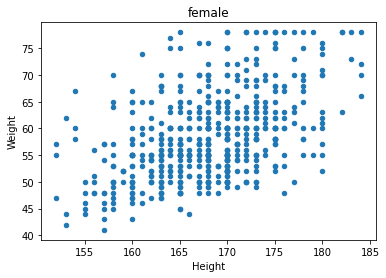

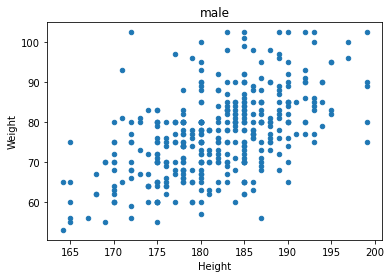

In [34]:
### Detecting multivariate outlier
for gen in new_df.Gender.unique() :
    BM = new_df.Gender == gen
    new_df[BM].plot.scatter(x='Height',y='Weight')
    plt.title(gen)
    plt.show()

### DataFrame에서 Replace 사용가능!

In [35]:
### Categorical이므로 Numerical로 변경
new_df.Gender.replace({'male' : 0 , 'female' : 1}, inplace=True)

In [36]:
from sklearn.linear_model import LinearRegression
x = ['Height','Gender']
y = 'Weight'
data_x = new_df[x]
data_y = new_df[y]
lm = LinearRegression()
lm.fit(data_x, data_y)

LinearRegression()

In [37]:
print('intercept (b0)', lm.intercept_)
coef_names = ['b1','b2']
for i in [0,1] :
    print('-'*20)
    print('Predictor : ', data_x.columns[i])
    print('coef_name : ', coef_names[i])
    print('coef_value : ', lm.coef_[i]) ## Coeffiecient : attribute의 가중값

intercept (b0) -51.10382582783848
--------------------
Predictor :  Height
coef_name :  b1
coef_value :  0.7040247759997819
--------------------
Predictor :  Gender
coef_name :  b2
coef_value :  -8.60201683812141


### Example 5 KNN 구하기

In [38]:
chicago_df = pd.read_csv('data/ch11/chicago_population.csv')

chicago_df.head(1)

,name,population,income,latino,black,white,asian,other
0,Rogers Park,54991,39482,0.244,0.263,0.393,0.064,0.036


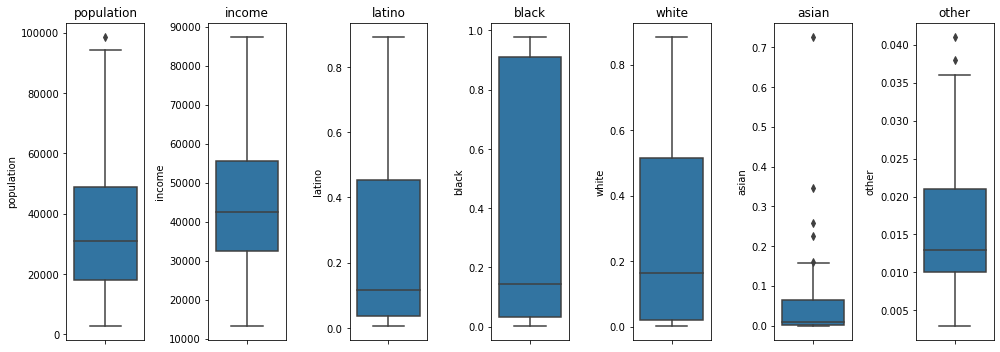

In [39]:
test_set = chicago_df.drop(columns='name').columns
test_len = len(test_set)

plt.figure(figsize=(14,5))
for i, col in enumerate(test_set) : 
    plt.subplot(1,test_len,i+1)
    sns.boxplot(y=chicago_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [40]:
for  col in ['population','asian','other'] :
    Q3 = chicago_df[col].quantile(0.75)
    Q1 = chicago_df[col].quantile(0.25)
    IQR = Q3-Q1
    lower_cap = Q1 - 1.5*IQR
    upper_cap = Q3 + 1.5*IQR
    
    BM = chicago_df[col] > upper_cap
    chicago_df.loc[chicago_df[BM].index, col ] = upper_cap

    BM = chicago_df[col] < lower_cap
    chicago_df.loc[chicago_df[BM].index, col ] = lower_cap

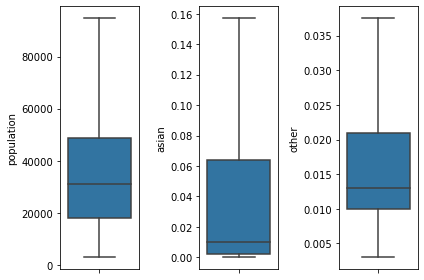

In [41]:
for  i,col in enumerate(['population','asian','other']) :
    plt.subplot(1,3,i+1)
    sns.boxplot(y=chicago_df[col])
plt.tight_layout()

In [42]:
from sklearn.cluster import KMeans
xs = chicago_df.drop(columns='name')
xs = (xs-xs.min()) / (xs.max() - xs.min()) ### normalization
kmeans = KMeans(n_clusters=5)
kmeans.fit(xs)

KMeans(n_clusters=5)

In [43]:
for i in range(5):
    BM = kmeans.labels_ == i
    print('cluster {} : {}'.format(i,chicago_df['name'][BM].values))


cluster 0 : ['Armour Square' 'McKinley Park' 'Bridgeport']
cluster 1 : ['Austin' 'West Garfield Park' 'East Garfield Park' 'North Lawndale'
 'Douglas' 'Oakland' 'Fuller Park' 'Grand Boulevard' 'Kenwood'
 'Washington Park' 'Woodlawn' 'South Shore' 'Chatham' 'Avalon Park'
 'South Chicago' 'Burnside' 'Calumet Heights' 'Roseland' 'Pullman'
 'South Deering' 'West Pullman' 'Riverdale' 'West Englewood' 'Englewood'
 'Greater Grand Crossing' 'Auburn Gresham' 'Washington Heights'
 'Morgan Park']
cluster 2 : ['Montclare' 'Belmont Cragin' 'Hermosa' 'Avondale' 'Logan Square'
 'Humboldt Park' 'South Lawndale' 'Lower West Side' 'East Side'
 'Hegewisch' 'Archer Heights' 'Brighton Park' 'New City' 'West Elsdon'
 'Gage Park' 'Clearing' 'West Lawn' 'Chicago Lawn' 'Ashburn']
cluster 3 : ['Rogers Park' 'West Ridge' 'Uptown' 'Lincoln Square' 'North Park'
 'Albany Park' 'Irving Park' 'Near West Side' 'Loop' 'Near South Side'
 'Hyde Park' 'Edgewater']
cluster 4 : ['North Center' 'Lake View' 'Lincoln Park' 'Ne

<AxesSubplot:xlabel='population', ylabel='income'>

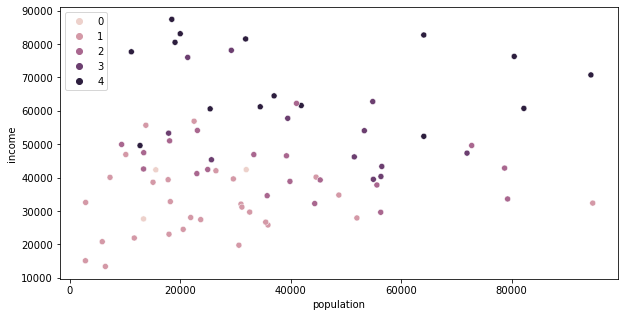

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'population', y='income', hue=kmeans.labels_, data=chicago_df)
    


In [45]:
# cluster별 median을 찾아서 heatmap을 그려보자. dataframe으로도 heatmap을 그릴 수 있다.

cluster = [f'cluster{i}' for i in range(5)]

### 0.0을 하는 이유가 type을 float으로 만들기 위함이었구나.
heatmap_df = pd.DataFrame(0.0,index=cluster, columns= chicago_df.drop(columns='name').columns )

for i, var in enumerate(cluster) :
    BM = kmeans.labels_ == i
    heatmap_df.loc[var] = xs[BM].median(axis=0)
heatmap_df

,population,income,latino,black,white,asian,other
cluster0,0.138709,0.391102,0.297175,0.018462,0.190692,1.000000,0.231884
cluster1,0.210857,0.246312,0.015254,0.962051,0.009648,0.009554,0.289855
cluster2,0.396284,0.394398,0.850847,0.036923,0.169126,0.063694,0.144928
cluster3,0.539921,0.499014,0.187006,0.129231,0.534620,0.853503,0.753623
cluster4,0.344562,0.775070,0.122034,0.029744,0.843360,0.292994,0.463768


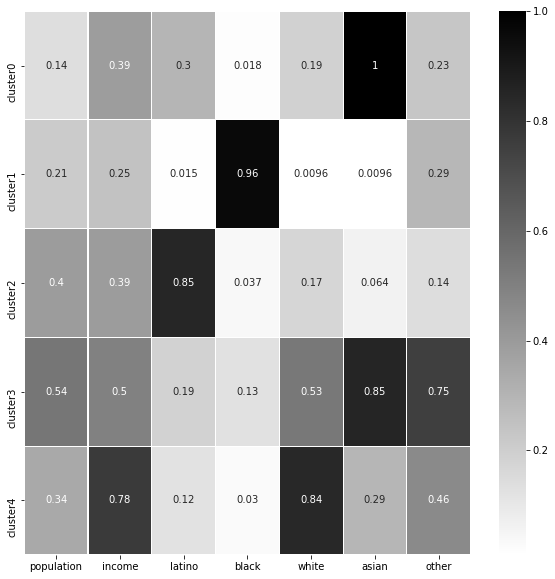

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(heatmap_df, linewidths=0.1, annot=True, cmap='binary')
plt.show()